# Analalyse de la distribution du vocabulaire

## Imports et dépendances

In [20]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Créer une une liste de stopwords

In [21]:
sw = stopwords.words("french")
sw += ["les", "plus", "cette", "fait", "faire", "être", "deux", "comme", "dont", "tout", 
       "ils", "bien", "sans", "peut", "tous", "après", "ainsi", "donc", "cet", "sous",
       "celle", "entre", "encore", "toutes", "pendant", "moins", "dire", "cela", "non",
       "faut", "trois", "aussi", "dit", "avoir", "doit", "contre", "depuis", "autres",
       "van", "het", "autre", "jusqu"]
sw = set(sw)

In [22]:
print(f"{len(sw)} stopwords:\n {sorted(sw)}")

197 stopwords:
 ['ai', 'aie', 'aient', 'aies', 'ainsi', 'ait', 'après', 'as', 'au', 'aura', 'aurai', 'auraient', 'aurais', 'aurait', 'auras', 'aurez', 'auriez', 'aurions', 'aurons', 'auront', 'aussi', 'autre', 'autres', 'aux', 'avaient', 'avais', 'avait', 'avec', 'avez', 'aviez', 'avions', 'avoir', 'avons', 'ayant', 'ayante', 'ayantes', 'ayants', 'ayez', 'ayons', 'bien', 'c', 'ce', 'cela', 'celle', 'ces', 'cet', 'cette', 'comme', 'contre', 'd', 'dans', 'de', 'depuis', 'des', 'deux', 'dire', 'dit', 'doit', 'donc', 'dont', 'du', 'elle', 'en', 'encore', 'entre', 'es', 'est', 'et', 'eu', 'eue', 'eues', 'eurent', 'eus', 'eusse', 'eussent', 'eusses', 'eussiez', 'eussions', 'eut', 'eux', 'eûmes', 'eût', 'eûtes', 'faire', 'fait', 'faut', 'furent', 'fus', 'fusse', 'fussent', 'fusses', 'fussiez', 'fussions', 'fut', 'fûmes', 'fût', 'fûtes', 'het', 'il', 'ils', 'j', 'je', 'jusqu', 'l', 'la', 'le', 'les', 'leur', 'lui', 'm', 'ma', 'mais', 'me', 'mes', 'moi', 'moins', 'mon', 'même', 'n', 'ne', 'non'

## Tokeniser

In [23]:
# Récupération du contenu du fichier
path = "../data/all.txt"
limit = 10**8

with open(path, 'r', encoding='utf-8') as f:
    text = f.read()[:limit]

In [24]:
# Tokenization
words = nltk.wordpunct_tokenize(text)
print(f"{len(words)} words found")

32332 words found


In [25]:
words[:10]

['plus',
 'grand',
 'soin',
 'd',
 "'",
 'éloigné',
 '**',
 'toute',
 'éventualité',
 'dangereuse']

## Calculer la taille du vocabulaire

In [26]:
# Eliminer les stopwords et les termes non alphabétiques
kept = [w.lower() for w in words if len(w) > 2 and w.isalpha() and w.lower() not in sw]
voc = set(kept)
print(f"{len(kept)} words kept ({len(voc)} different word forms)")

11938 words kept (6158 different word forms)


## Récupérer les mots les plus fréquents et en faire un plot

In [32]:
fdist = nltk.FreqDist(kept)
fdist.most_common(10)

[('écoles', 53),
 ('etat', 39),
 ('loi', 35),
 ('gouvernement', 34),
 ('heures', 32),
 ('rue', 32),
 ('chambre', 28),
 ('france', 26),
 ('très', 26),
 ('grand', 24)]

<AxesSubplot: xlabel='Samples', ylabel='Cumulative Counts'>

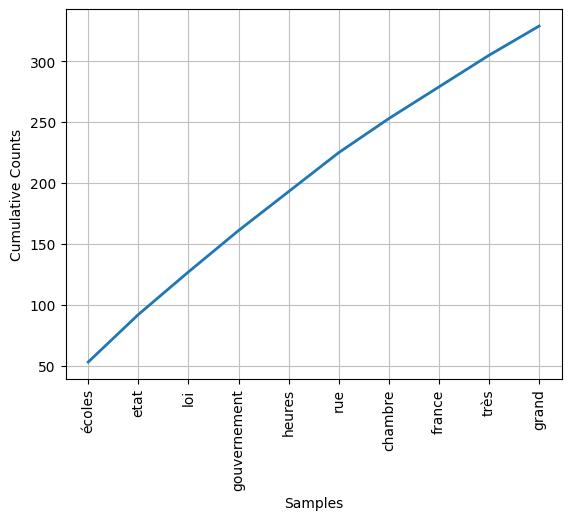

In [33]:
# Plot: les n mots les plus fréquents
n = 10
fdist.plot(n, cumulative=True)

## Détecter les Hapax (mots qui n'apparaissent qu'une fois dans le corpus)

In [29]:
fdist.hapaxes()[:30]

['soin',
 'éloigné',
 'éventualité',
 'déslfçuse',
 'jîfliif',
 'ofgilné',
 'ail',
 'inistsrë',
 'jiâs',
 'nloyeh',
 'ile',
 'troublée',
 'moiiiina',
 'décisif',
 'trouvé',
 'solides',
 'vagues',
 'déclarations',
 'siiis',
 'cherche',
 'exciter',
 'peuple',
 'instincts',
 'signale',
 'testante',
 'ngleterre',
 'man',
 'uvres',
 'adversaires',
 'laites']

## Trouver les mots les plus longs du corpus

In [34]:
n = 30
sorted(voc, key=len, reverse=True)[:n]

['elleavaitgracicusemenuccédé',
 'colorationlecharmantrôled',
 'enentendantretentirce',
 'enseignementprimaire',
 'approvisionnements',
 'exceptionnellement',
 'oiitétéprtcôdéesd',
 'perfectionnement',
 'chifrlottenbourg',
 'docniiiparabrocn',
 'considérablement',
 'interviendraient',
 'gouvefnementsont',
 'dèiappolntemontl',
 'concessionnaires',
 'merveilleusement',
 'administrations',
 'représentatives',
 'vandenpeereboom',
 'professionnelle',
 'renchérissement',
 'administratives',
 'honriltochefort',
 'feldzeugniestfo',
 'correctionnelle',
 'représentations',
 'vindenpecrebuom',
 'clandestinement',
 'rétablissement',
 'retranchements']